<a href="https://colab.research.google.com/github/madhumakireddy/cs666student/blob/main/Copy_of_CS666_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

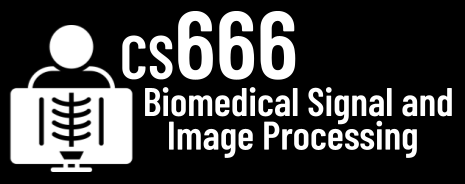
#Assignment 5

In [1]:
# NAME:MAKIREDDY Madhu sudhanareddy

In [2]:
# In this assignment, we will visualize and explore a CT scan!

In [3]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
# we are using pydicom, so lets install it!
!pip install pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.4 MB/s eta 0:00:00


**Task 1**: Download and visualize data with SliceDrop! [20 Points]

In [5]:
# Please download https://cs666.org/data/ct.zip and extract it on your computer!
# This is a CT scan of an arm in DICOM format.

In [6]:
# 1) Let's explore the data without loading it.
# TODO: Without loading the data, how many slices are there?

In [7]:
# TODO: YOUR_ANSWER 
#220 slices

In [8]:
# 2) Let's visualize the data with SliceDrop! 
# Go to https://slicedrop.com and drag'n'drop all .dcm files into the browser.
# Please use the 2D sliders to show axial, sagittal, and coronal slices in 3D.


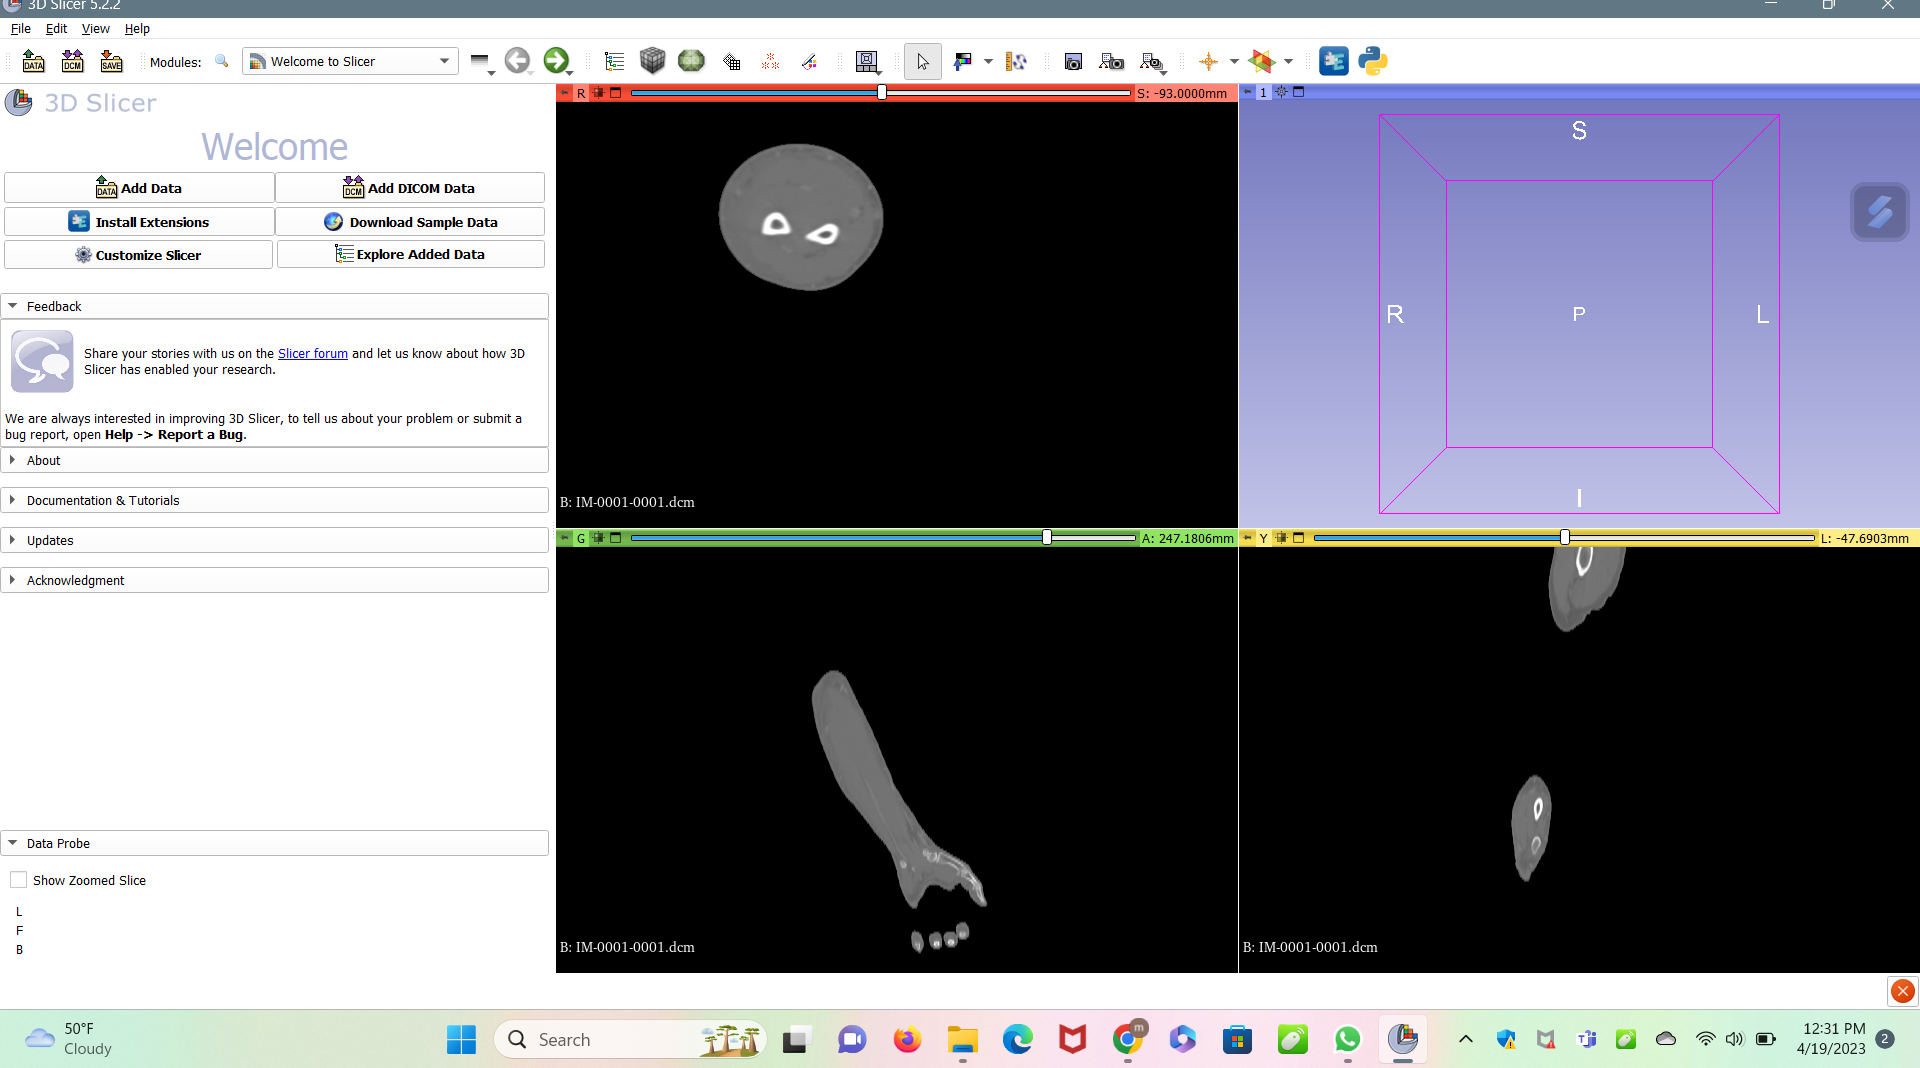

In [9]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by 
# using the Upload image button after double-click. This should not be volume
# rendering but show the 3 cross sections.

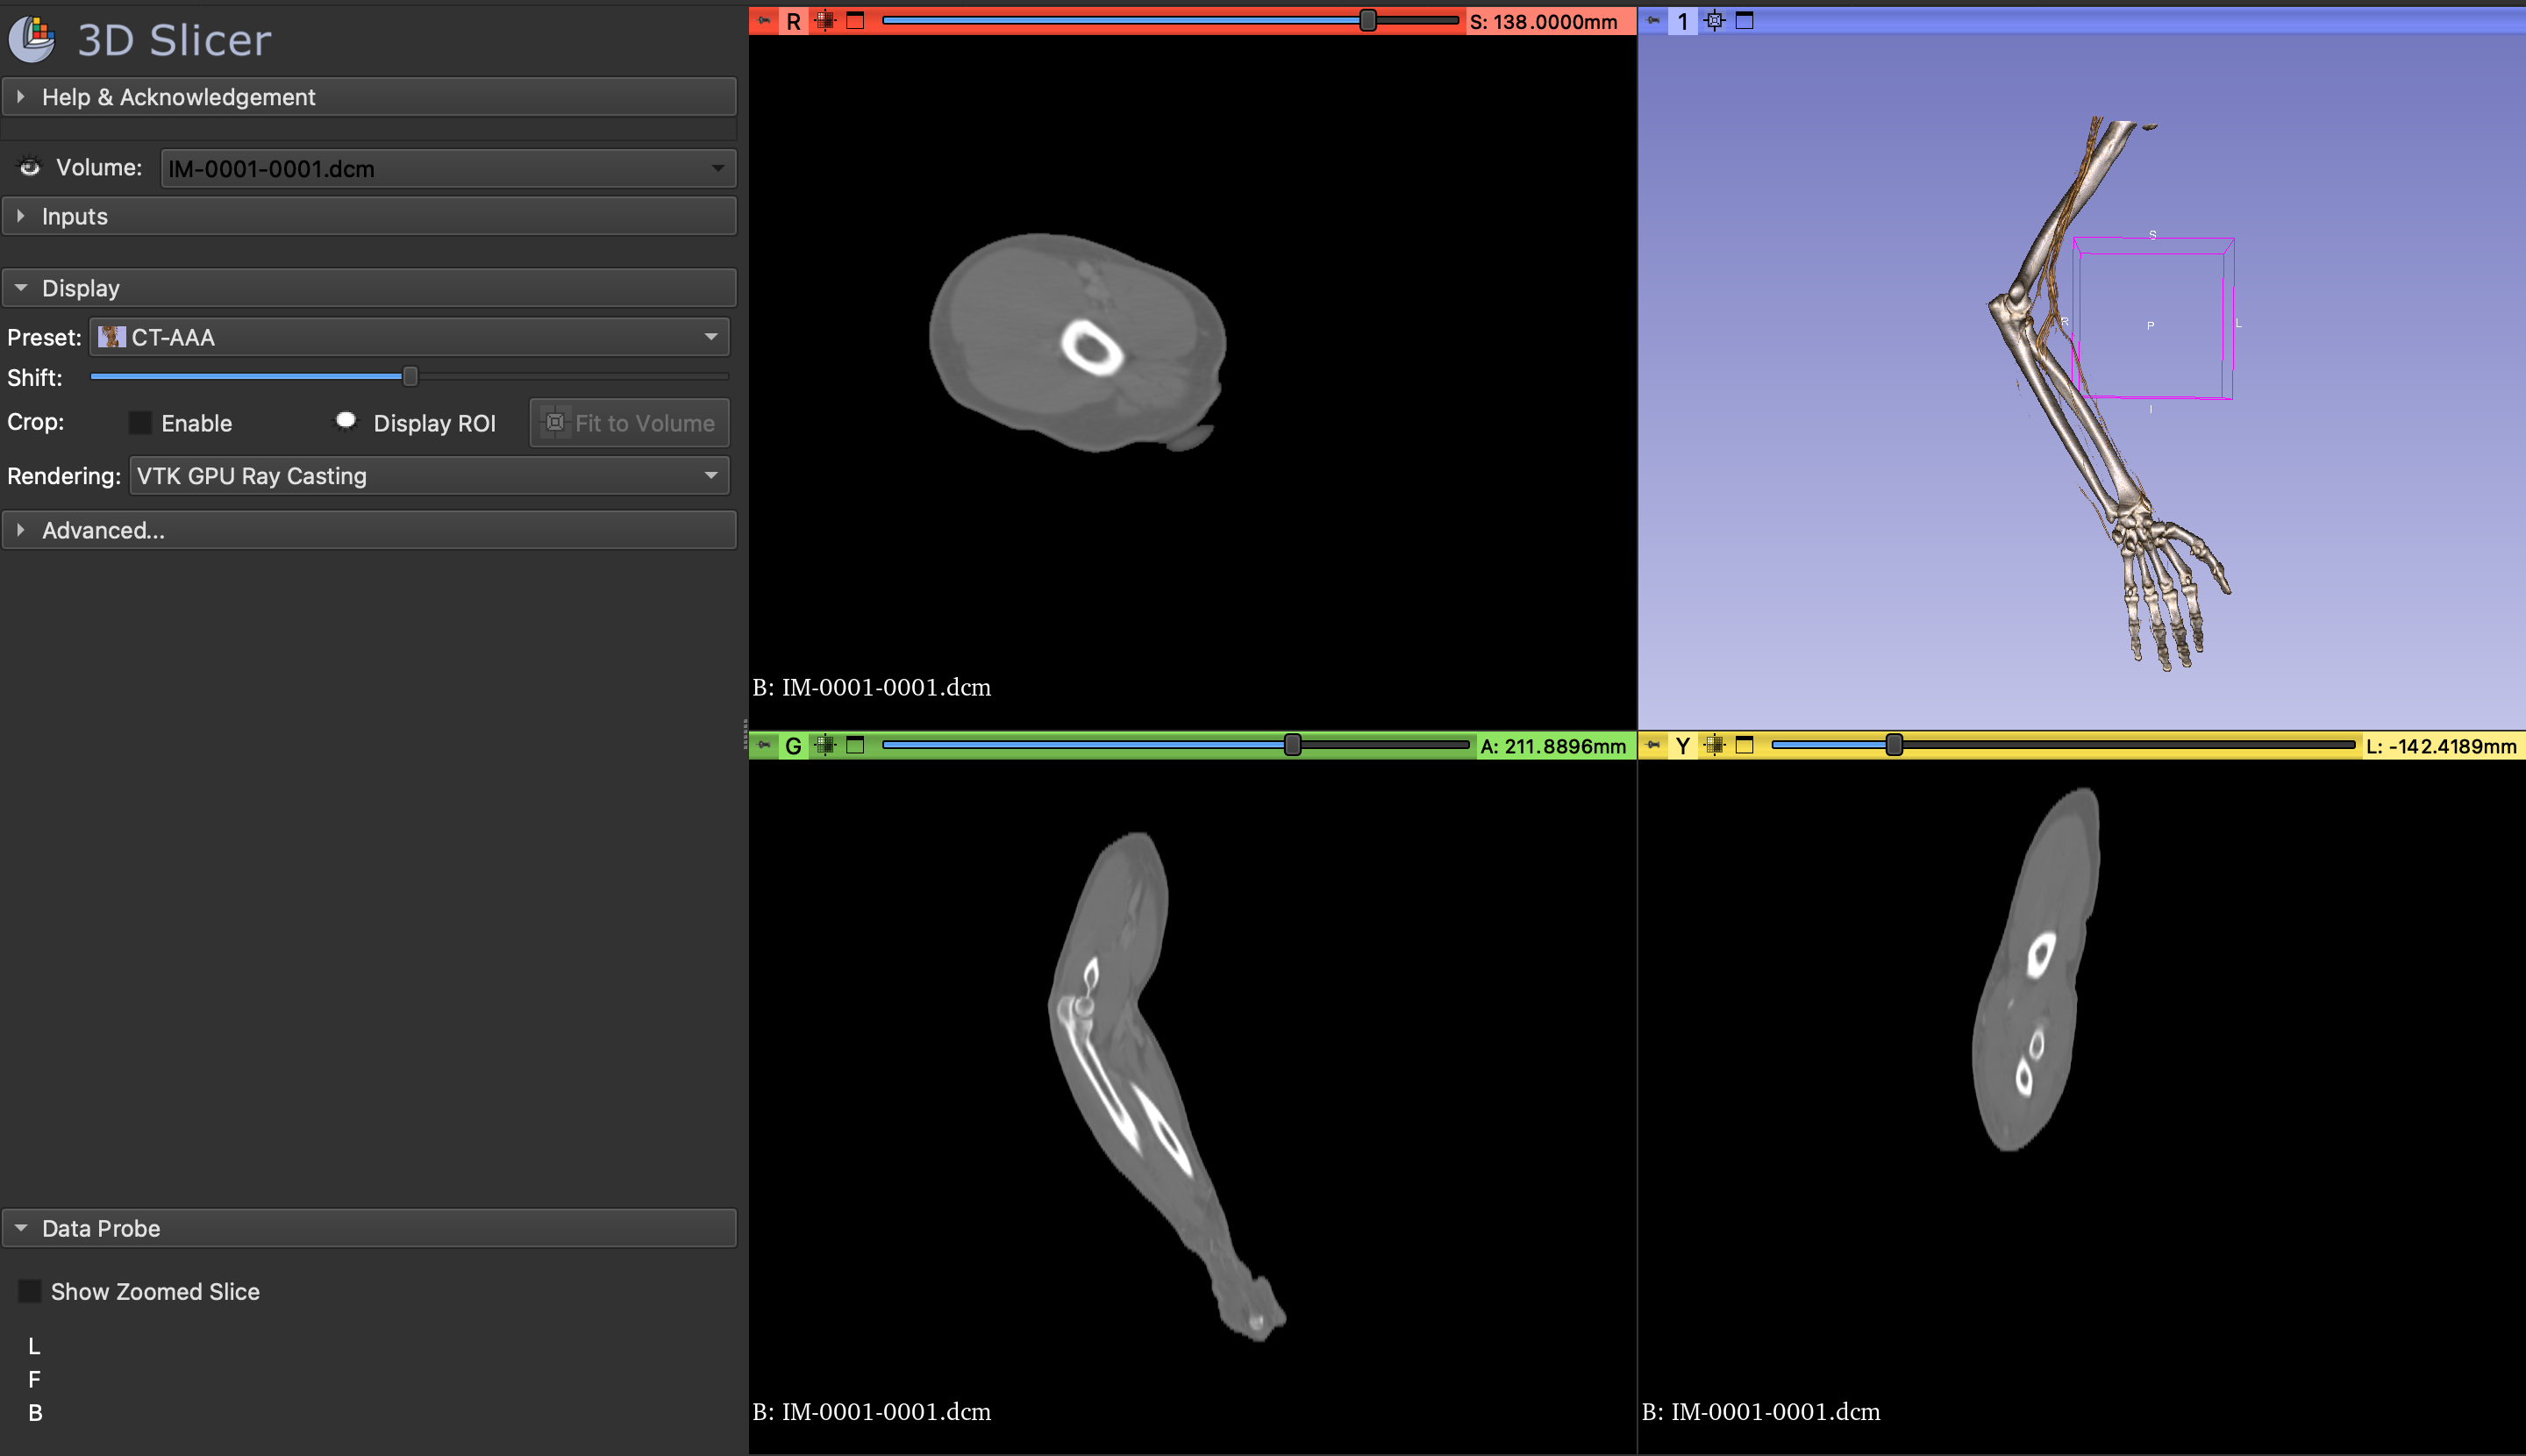

In [10]:
# 3) Let's visualize only the bones! Please use the thresholding
# based on a window suitable for bones and show a 3D volume rendering.

In [11]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by 
# using the Upload image button after double-click.

**Task 2**: Load the data using pydicom as a 3D volume and then reslice it! [35 Points]

In [12]:
# TODO: Please upload ct.zip using the file panel on the left.
# Then use the following snippet to extract the data.

In [13]:
import zipfile
with zipfile.ZipFile('ct.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [14]:
# 1) Now loop through all the DICOM files and store them in a 3D numpy array.
# Hint: You can either store them in a list first or read the dimensions of a
# single image slice to properly create the 3D numpy array.
# Hint 2: os.listdir(DIR) gives a list of filenames in a directory.
# Hint 2b: This list is not sorted - make sure you sort it.
# Hint 3: The dcmread function loads a single DICOM file.
# Hint 4: You can then use .pixel_array to access the image data.

In [15]:
from pydicom import dcmread




In [16]:
import os
import numpy as np
from pydicom import dcmread

# Set the path to the directory containing the DICOM files
dir_path = '/content/ct'

# Get a list of all the DICOM files in the directory
file_names = os.listdir(dir_path)
file_names.sort()
print("No. of File : ",len(file_names))
print(file_names)

# Load the first DICOM file to get the dimensions of the images
first_file = dcmread(os.path.join(dir_path, file_names[0]))
rows = first_file.Rows
cols = first_file.Columns
num_slices = len(file_names)
volume = np.zeros((rows, cols, num_slices), dtype=np.int16)

# Initialize the 3D numpy array
ct_data = np.zeros((rows, cols, num_slices), dtype=np.int16)

# Loop through all the DICOM files and store them in the numpy array
for i, file_name in enumerate(file_names):
    file_path = os.path.join(dir_path, file_name)
    dicom_file = dcmread(file_path)
    ct_data[:, :, i] = dicom_file.pixel_array


No. of File :  220
['IM-0001-0001.dcm', 'IM-0001-0002.dcm', 'IM-0001-0003.dcm', 'IM-0001-0004.dcm', 'IM-0001-0005.dcm', 'IM-0001-0006.dcm', 'IM-0001-0007.dcm', 'IM-0001-0008.dcm', 'IM-0001-0009.dcm', 'IM-0001-0010.dcm', 'IM-0001-0011.dcm', 'IM-0001-0012.dcm', 'IM-0001-0013.dcm', 'IM-0001-0014.dcm', 'IM-0001-0015.dcm', 'IM-0001-0016.dcm', 'IM-0001-0017.dcm', 'IM-0001-0018.dcm', 'IM-0001-0019.dcm', 'IM-0001-0020.dcm', 'IM-0001-0021.dcm', 'IM-0001-0022.dcm', 'IM-0001-0023.dcm', 'IM-0001-0024.dcm', 'IM-0001-0025.dcm', 'IM-0001-0026.dcm', 'IM-0001-0027.dcm', 'IM-0001-0028.dcm', 'IM-0001-0029.dcm', 'IM-0001-0030.dcm', 'IM-0001-0031.dcm', 'IM-0001-0032.dcm', 'IM-0001-0033.dcm', 'IM-0001-0034.dcm', 'IM-0001-0035.dcm', 'IM-0001-0036.dcm', 'IM-0001-0037.dcm', 'IM-0001-0038.dcm', 'IM-0001-0039.dcm', 'IM-0001-0040.dcm', 'IM-0001-0041.dcm', 'IM-0001-0042.dcm', 'IM-0001-0043.dcm', 'IM-0001-0044.dcm', 'IM-0001-0045.dcm', 'IM-0001-0046.dcm', 'IM-0001-0047.dcm', 'IM-0001-0048.dcm', 'IM-0001-0049.dcm', 

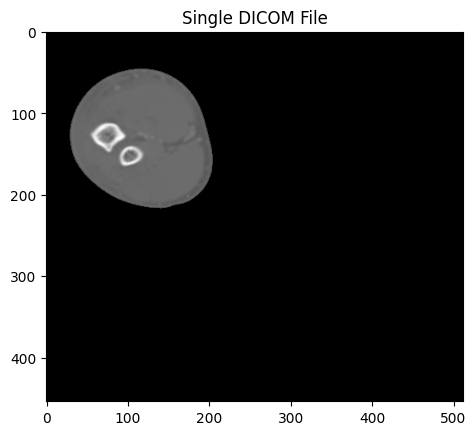

Dimensions:  (454, 512)


In [17]:
import os
import pydicom
import matplotlib.pyplot as plt

# Define the directory containing the DICOM files
dir_path = '/content/ct'

# Load all the DICOM files in the directory
files_list = os.listdir(dir_path)
files = [pydicom.dcmread(os.path.join(dir_path, f)) for f in files_list]

# Extract the pixel array from a single DICOM file
single_file = files[0].pixel_array

# Display the image using imshow() with cmap='gray'
plt.imshow(single_file, cmap='gray')
plt.title('Single DICOM File')
plt.show()

# Print the dimensions of the pixel array
print('Dimensions: ', single_file.shape)


In [18]:
single_file = files[0].pixel_array

# Get the dimensions of the 2D numpy array
r, c = single_file.shape

# Create a 3D numpy array of zeros with the same dimensions as the pixel array
l = len(files_list)
new3Darray = np.zeros((l, r, c), dtype=np.float32)

# Print the shape of the 3D numpy array
print(new3Darray.shape)

(220, 454, 512)


In [19]:
single_file = files[0].pixel_array
r, c = single_file.shape

# Create a 3D numpy array of zeros with the same dimensions as the pixel array
l = len(files_list)
new3Darray = np.zeros((l, r, c), dtype=np.float32)

# Loop through all the DICOM files and fill in the 3D numpy array
for i, file in enumerate(files):
    new3Darray[i, :, :] = file.pixel_array

# Print the 3D numpy array and its shape
print(new3Darray)
print(new3Darray.shape)






[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]
(220, 454,

In [20]:
# 2) Now create and show axial, sagittal, and coronal slices from the 3D volume.
# Hint: Please use imshow(XX, cmap='gray') to show the image.

In [21]:
import numpy as np
import os
from pydicom import dcmread
import matplotlib.pyplot as plt
dir = '/content/ct'
files = [f for f in os.listdir(dir) if f.endswith('.dcm')]
files = sorted(files)
tmp = dcmread(os.path.join(dir, files[0]))
nrows = int(tmp.Rows)
ncols = int(tmp.Columns)
nslices = len(files)
print('number of rows=',nrows)
print('number of columns=',ncols)
print('number of slices=',nslices)
all_slices = np.zeros((nrows, ncols, nslices), dtype=np.float32)
for i, file_path in enumerate(files):

  ct_file = dcmread(os.path.join(dir, file_path))
  all_slices[:, :, i] = ct_file.pixel_array.astype(np.float32)
  


number of rows= 454
number of columns= 512
number of slices= 220


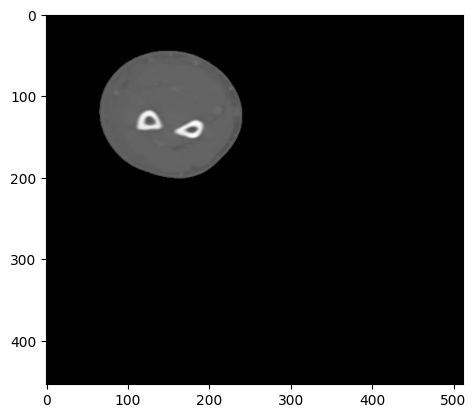

In [22]:
# TODO: YOUR CODE FOR AXIAL

axial_slice = all_slices[:, :, int(nslices/2)]
plt.imshow(axial_slice, cmap='gray')
plt.show()


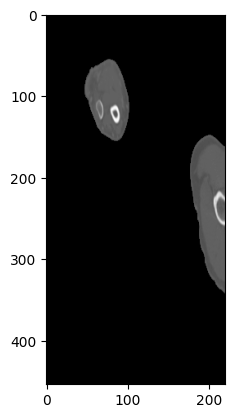

In [23]:
# TODO: YOUR CODE FOR SAGITTAL
sagittal = all_slices[:, int(ncols/2), :]
plt.imshow(sagittal, cmap='gray')
plt.show()


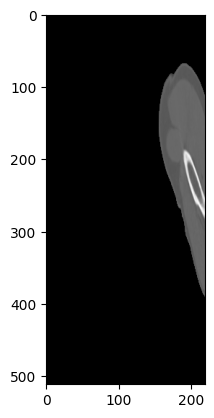

In [24]:
# TODO: YOUR CODE FOR CORONAL
# Determine y-coordinate of the axial slice to take
coronal = all_slices[int(nrows/2), :, :]
plt.imshow(coronal, cmap='gray')
plt.show()

**Task 3**: Use the Window/Level-technique to visualize the data! [45 Points]

In [25]:
# We will now enhance the visualization from above by performing 
# Window/Level adjustment.
# Here is one way of doing that:
#   vmin = level - window/2
#   vmax = level + window/2
#   plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
#   plt.show()

In [26]:
# 1) Please load the Window/Level values from the DICOM file,
# print these values, and then visualize one slice with window/level adjustment.
# Hint: The DICOM header has the following tags.
#   (0028, 1050) Window Center 
#   (0028, 1051) Window Width
# Hint 2: You can use slice[key].value to access DICOM tag values.
# Hint 3: (0028, 1052) Rescale Intercept might be important.

In [27]:


ct_file

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 202
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7238010.5.1.4.0.75157.1397189445.5142
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7238010.5.0.3.5.4
(0002, 0013) Implementation Version Name         SH: 'OSIRIX'
(0002, 0016) Source Application Entity Title     AE: 'DicomBrowser'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT_SOM5 SPI']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7238010.5.1.4.0.75157.1397189445.5142
(0008, 0020) Study Date                      

In [28]:
# TODO: YOUR CODE

Window Center: 30
Window Width: 410
Rescale Intercept: -1024


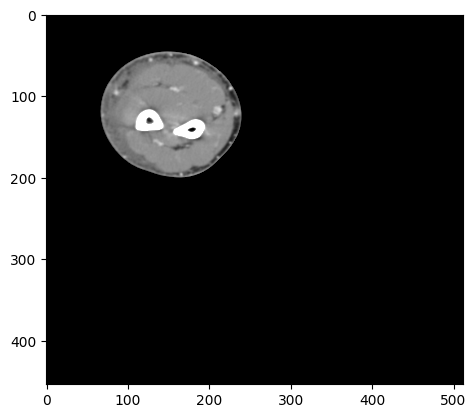

In [29]:

import numpy as np
import os
from pydicom import dcmread
import matplotlib.pyplot as plt
dir = '/content/ct'
dir = '/content/ct'
files = [f for f in os.listdir(dir) if f.endswith('.dcm')]
files = sorted(files)
# from the soreted file take the first file
window_center = first_file[0x0028, 0x1050].value
window_width = first_file[0x0028, 0x1051].value
rescale_intercept = first_file[0x0028, 0x1052].value

# Print the Window Center, Window Width, and Rescale Intercept


# Apply the Rescale Intercept to the slice data
hu_pixels = axial_slice + rescale_intercept

# Calculate vmin and vmax for window/level
vmin = window_center - window_width / 2
vmax = window_center + window_width / 2

# Visualize the slice
print("Window Center:", window_center)
print("Window Width:", window_width)
print("Rescale Intercept:", rescale_intercept)
plt.imshow(hu_pixels, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()
     




In [30]:
# 2) Play around with different Window/Level values that enhancenter
# the visualization.

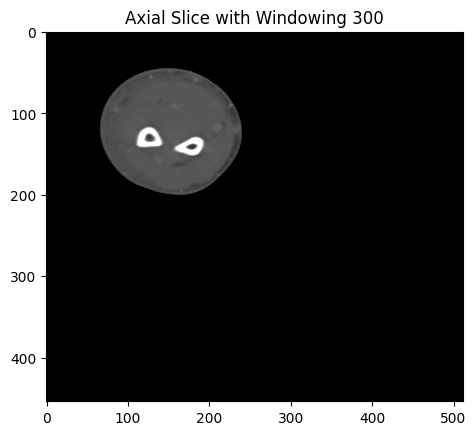

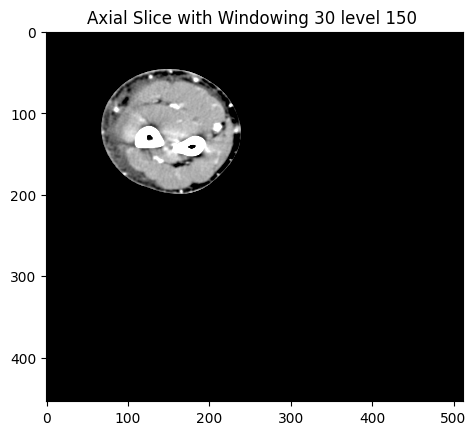

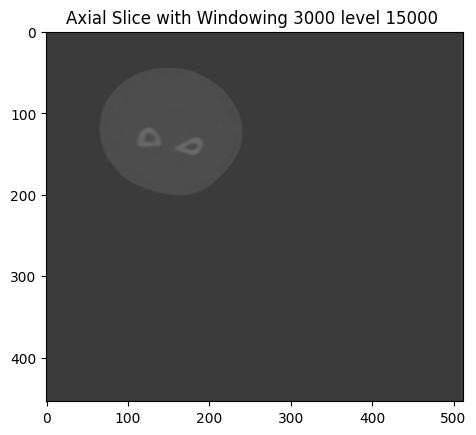

In [31]:

window_center= 300
window_width = 1500

# Calculate vmin and vmax for bone windowing
vmin = window_center - window_width / 2
vmax = window_center + window_width / 2

# Visualize the slice with bone windowing
plt.imshow(hu_pixels, cmap='gray', vmin=vmin, vmax=vmax)
plt.title('Axial Slice with Windowing 300')
plt.show("")
window_center= 30
window_width = 150

# Calculate vmin and vmax for bone windowing
vmin = window_center - window_width / 2
vmax = window_center + window_width / 2

# Visualize the slice with bone windowing
plt.imshow(hu_pixels, cmap='gray', vmin=vmin, vmax=vmax)
plt.title('Axial Slice with Windowing 30 level 150 ')
plt.show()
window_center= 3000
window_width = 15000

# Calculate vmin and vmax for bone windowing
vmin = window_center - window_width / 2
vmax = window_center + window_width / 2

# Visualize the slice with bone windowing
plt.imshow(hu_pixels, cmap='gray', vmin=vmin, vmax=vmax)
plt.title('Axial Slice with Windowing 3000 level 15000 ')
plt.show()

In [32]:
# Which values make sense and why?

In [33]:
# TODO: YOUR ANSWER


Some suitable Window Center and Window Width values for this specific CT scan of an arm could be:
width: 3000; level: 1500.


With these numbers, we can see the bone structures clearly and in depth while also displaying the nearby soft tissues. The ideal parameters, however, may change based on the viewer's tastes or the particular diagnostic task at hand.

**Bonus**: Create segmentations (label maps) for the volume using thresholding HU! [33 Points]

In [34]:
# Similar to Window/Level adjustment for visualization, we can threshold
# the volume to highlight the following components using the Hounsfield Units:
# 1) Fat
# 2) Soft Tissue
# 3) Bones
#
# Please create 3 segmentation masks for these structures.
# Then, please visualize each 3 slices per structure to showcase the segmentation.
# Hint: As a reminder, the following code allows thresholding of a numpy array.
#   new_mask = imagevolume.copy()
#   new_mask[new_mask < XXX] = 0
# Hint2: You might need to cast new_mask to int16 not uint16.

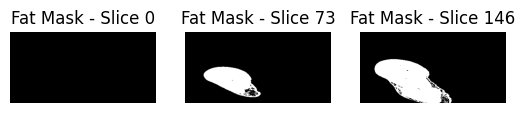

In [38]:
# TODO: YOUR CODE TO SEGMENT FAT
import numpy as np
import os
from pydicom import dcmread
import matplotlib.pyplot as plt

# Define the directory where the DICOM files are located
dir = '/content/ct'

# Read in the DICOM files
files = [f for f in os.listdir(dir) if f.endswith('.dcm')]
files = sorted(files)

# Read the first DICOM file to get important metadata
first_file = dcmread(os.path.join(dir, files[0]))

# Get window/level values and rescale intercept
window_center = first_file[0x0028, 0x1050].value
window_width = first_file[0x0028, 0x1051].value
rescale_intercept = first_file[0x0028, 0x1052].value

# Get the number of slices
nslices = len(files)

# Read in all the slices and apply rescale intercept
all_slices = []
for f in files:
    ds = dcmread(os.path.join(dir, f))
    slice_data = ds.pixel_array.astype(float)
    slice_data += rescale_intercept
    all_slices.append(slice_data)

# Convert the slice data to a numpy array
all_slices = np.array(all_slices)

# Define Hounsfield Unit thresholds for each structure
fat_threshold = -100
soft_tissue_threshold = 1050
bone_threshold = 1200

# Create segmentation masks for each structure
fat_mask = all_slices.copy()
fat_mask[fat_mask >= fat_threshold] = 1
fat_mask[fat_mask < fat_threshold] = 0

soft_tissue_mask = all_slices.copy()
soft_tissue_mask[soft_tissue_mask >= soft_tissue_threshold] = 1
soft_tissue_mask[soft_tissue_mask < soft_tissue_threshold] = 0

bone_mask = all_slices.copy()
bone_mask[bone_mask >= bone_threshold] = 1
bone_mask[bone_mask < bone_threshold] = 0

# Cast the segmentation masks to int16
fat_mask = fat_mask.astype(np.int16)
soft_tissue_mask = soft_tissue_mask.astype(np.int16)
bone_mask = bone_mask.astype(np.int16)

# Visualize 3 slices for each structure
for i in range(3):
    # Fat
    plt.subplot(3, 3, i+1)
    plt.imshow(fat_mask[:, :, i*int(nslices/3)], cmap='gray')
    plt.title(f"Fat Mask - Slice {i*int(nslices/3)}")
    plt.axis('off')


plt.show()

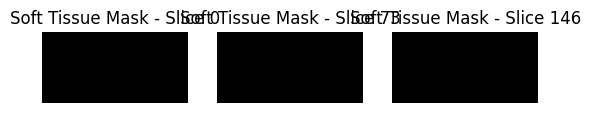

In [37]:
# TODO: YOUR CODE TO SEGMENT SOFT TISSUE
 # Soft Tissue
for i in range(3):
    plt.subplot(3, 3, i+4)
    plt.imshow(soft_tissue_mask[:, :, i*int(nslices/3)], cmap='gray')
    plt.title(f"Soft Tissue Mask - Slice {i*int(nslices/3)}")
    plt.axis('off')
plt.show()

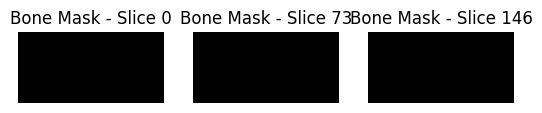

In [45]:
# TODO: YOUR CODE TO SEGMENT BONES
 # Bone
  # Soft Tissue
for i in range(3):
    plt.subplot(3, 3, i+1)
    plt.imshow(bone_mask[:, :, i*int(nslices/3)], cmap='gray')
    plt.title(f"Bone Mask - Slice {i*int(nslices/3)}")
    plt.axis('off')
plt.show()

In [ ]:
# Are the segmentations good?
# here the segmenations is the contrast of the bone structutre

In [46]:
# TODO: YOUR ANSWER

In [47]:
#here the segementations of the soft tissues and the segment bones are not good

In [48]:
#
# Thank you and Great job!!
#
#                _.---._
#              .'       `.
#              :)       (:
#              \ (@) (@) /
#               \   A   /
#                )     (
#                \"""""/
#                 `._.'
#                  .=.
#          .---._.-.=.-._.---.
#         / ':-(_.-: :-._)-:` \
#        / /' (__.-: :-.__) `\ \
#       / /  (___.-` '-.___)  \ \
#      / /   (___.-'^`-.___)   \ \
#     / /    (___.-'=`-.___)    \ \
#    / /     (____.'=`.____)     \ \
#   / /       (___.'=`.___)       \ \
#  (_.;       `---'.=.`---'       ;._)
#  ;||        __  _.=._  __        ||;
#  ;||       (  `.-.=.-.'  )       ||;
#  ;||       \    `.=.'    /       ||;
#  ;||        \    .=.    /        ||;
#  ;||       .-`.`-._.-'.'-.       ||;
# .:::\      ( ,): O O :(, )      /:::.
# |||| `     / /'`--'--'`\ \     ' ||||
# ''''      / /           \ \      ''''
#          / /             \ \
#         / /               \ \
#        / /                 \ \
#       / /                   \ \
#      / /                     \ \
#     /.'                       `.\
#    (_)'                       `(_)
#     \\.                       .//
#      \\.                     .//
#       \\.                   .//
#        \\.                 .//
#         \\.               .//
#          \\.             .//
#     jgs   \\.           .//
#           ///)         (\\\
#         ,///'           `\\\,
#        ///'               `\\\
#       ""'                   '""